In [1]:
print('Meu nome é: Gabriel Moraes Barros ')
print('Meu RA é: 192801')

Meu nome é: Gabriel Moraes Barros 
Meu RA é: 192801


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
print(type(iris))
print('iris.data:',iris.data.shape,iris.data.dtype,iris.data.min(),iris.data.max())
print('iris.target:',iris.target.shape,iris.target.dtype,iris.target.min(),iris.target.max())
#print(iris.DESCR)
print('iris.features_name:',iris.feature_names)
print('iris.target_names:',iris.target_names)

iris_pd = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_pd['target'] = iris.target


<class 'sklearn.datasets.base.Bunch'>
iris.data: (150, 4) float64 0.1 7.9
iris.target: (150,) int64 0 2
iris.features_name: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
iris.target_names: ['setosa' 'versicolor' 'virginica']


In [4]:
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x = data[:,0:1]
y = data[:,1:2]

print('x.shape:',x.shape, x.dtype)
print('y.shape:',y.shape, y.dtype)


x.shape: (50, 1) float64
y.shape: (50, 1) float64


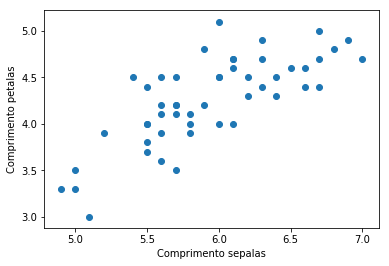

In [5]:
plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

In [6]:
x -= x.min()
x /= x.max()    # normalização
y -= y.min()
y /= y.max()

#y = 2*x        # útil para verificar se o programa está funcionando (como exercício)

## Visualização dos dados normalizados


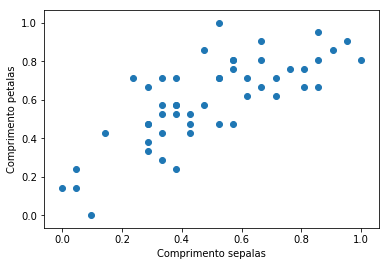

In [7]:
plt.scatter(x, y)
plt.xlabel('Comprimento sepalas')
plt.ylabel('Comprimento petalas')
plt.show()

### Código compute_cost

In [8]:
def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

### Gradiente Descendente por Lote (*batch*)

In [9]:
def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init.T
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

### Laço de minimização via gradiente descendente - Código

In [10]:
# Parâmetros do gradiente descendente: número de iterações e taxa de aprendizagem
iterations = 100
lr = 0.1

n_samples = y.shape[0]

#Montagem da matriz X agora com os elementos 1 na primeira coluna
X_bias = np.hstack([np.ones(shape=(n_samples,1)), x])
w_init = np.zeros(shape=(1,2))

w_history = batch_gradient_descent(X_bias, y, w_init, lr, iterations)
#print(w_history)

w_gd = w_history[::-1][0:1] # pega o último valor do gradiente descendente
print('w_gd:\n', w_gd)
print('final cost (gradiente descendente):', compute_cost(X_bias, y, w_gd.T))

J_history = compute_cost(X_bias, y, w_history.T)
print(J_history[:10])

w_gd:
 [[ 0.34857359  0.51798724]]
final cost (gradiente descendente): [ 0.02286703]
[ 0.40907029  0.24348202  0.1505187   0.09829049  0.0689112   0.05234888
  0.04297685  0.03763921  0.03456589  0.03276406]


### Plot da curva de minimização de J com o número de iterações

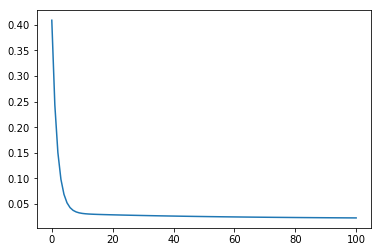

In [11]:
plt.plot(J_history) # mostrando log para amplificar valores baixos
#plt.ylim(0,1)
plt.show()

## Comparando com a solução analítica

A solução analítica deste problema é dada por:

$$  \mathbf{w} =(\mathbf{X}^T \mathbf{X})^{−1}\mathbf{X}^T \mathbf{y} $$

In [12]:
w_opt = (np.linalg.inv((X_bias.T).dot(X_bias)).dot(X_bias.T)).dot(y)
print(w_opt)
print('final cost (analítica):', compute_cost(X_bias, y, w_opt))

[[ 0.26134159]
 [ 0.68646976]]
final cost (analítica): [ 0.02116942]


## Plotagem da reta de predição (solução analítica e solução via gradiente descendente)

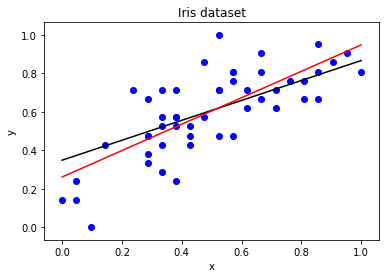

In [13]:
plt.scatter(x, y, marker='o', c='b')
plt.title('Iris dataset')
plt.xlabel('x')
plt.ylabel('y')

# Plotagem da reta utilizando os parâmetros ótimos encontrados no gradiente descendente

X_all = np.linspace(x.min(),x.max(),100).reshape(100,1)
X_all_bias = np.hstack([np.ones((100,1)),X_all])
result = X_all_bias.dot(w_gd.T)  # Predição via minimização gradiente descendente
plt.plot(X_all, result, c='k')
result_opt = X_all_bias.dot(w_opt)  # Predição do valor analítico
plt.plot(X_all, result_opt,c='r')
plt.show()

from Jview import Jview

Jview(X_bias, y, w_history, w_opt)



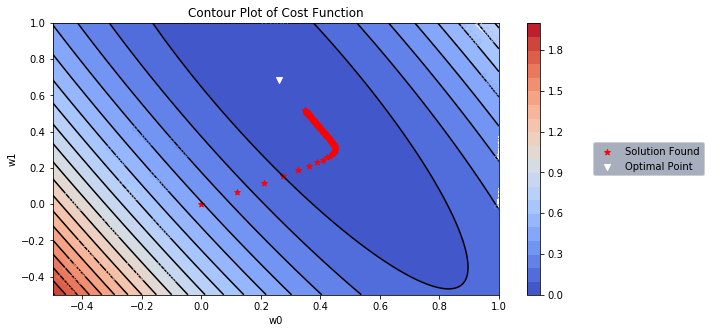

In [25]:
import matplotlib.cm as cm

def contour_plot(X_bias, y, w_history, w_opt):

    size = 256
    w0 = np.linspace(-0.5,1,size)
    w1 = np.linspace(-0.5,1,size)
    J_history_2 = np.zeros((len(w0),len(w1)))
    ws1, ws2 = np.meshgrid(w0,w1)
    w_grid = np.c_[ws1.ravel(), ws2.ravel()]

    J_history_2 = compute_cost(X_bias,y,w_grid.T)
    J_history_2 = J_history_2.reshape(size,size)
    
    fig = plt.figure(figsize=(10.0,5.0))
    CS = plt.contourf(w0, w1, J_history_2,20, cmap=cm.coolwarm ,label='Cost Function')
    plt.scatter(w_history[:,0],w_history[:,1], marker='*', color='r', label='Solution Found')
    plt.scatter(w_opt[0],w_opt[1], marker='v', color='w', label='Optimal Point')
    CB = plt.contour(w0, w1, J_history_2,20, colors='black', linewidth=.5)
    
    plt.clabel(CS, inline=1, fontsize=10)
    plt.colorbar(CS)
    plt.title("Contour Plot of Cost Function")
    plt.xlabel("w0")
    plt.ylabel("w1")
    #plt.figure(figsize=(10,6))
    
    #plt.legend(loc='best')
    legend = plt.legend(loc='center left', bbox_to_anchor=(1.2, 0.5))
    legend.get_frame().set_facecolor('#929aae')
    fig.savefig('fig_2D.png', bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show(fig)
contour_plot(X_bias, y, w_history, w_opt)

In [15]:
%ls -ls

total 804
  4 -rw-r--r-- 1 g192801 g192801   1706 Aug 15 09:27 Copying the file.ipynb
  8 -rw-r--r-- 1 g192801 g192801   7187 Aug 15 09:35 exercise_one_hot.ipynb
 88 -rw-r--r-- 1 g192801 g192801  87536 Aug 15 09:52 fig_2D.png
112 -rw-r--r-- 1 g192801 g192801 112494 Aug 15 09:42 fig_3D.png
592 -rw-r--r-- 1 g192801 g192801 604612 Aug 15 09:42 my_linear_regression.ipynb


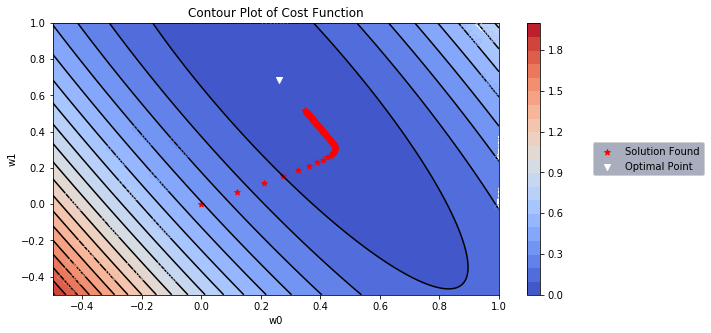

In [26]:
import IPython
img = IPython.display.Image(filename='fig_2D.png')
img

## Visualização da Perda x Parâmetros w0,w1 em gráfico 3D

A trecho a seguir permite a visualização da imagem anterior, agora numa superfície tridimensional de modo que para cada par de parâmetro $(w_0,w_1)$ o valor da perda $J(\mathbf{w})$ é uma altura da superfície no gráfico.
Sobre esta superfície da função Perda, os valores de $\mathbf{w}$ ocorridos durante a busca do
gradiente descendente é mostrado na forma de bolinhas vermelhas. Desta forma é possível acompanhar o caminho que a solução percorre até chegar à solução ótima.

from Jview import Jview3D

Jview3D(X_bias, y, w_history, w_opt)

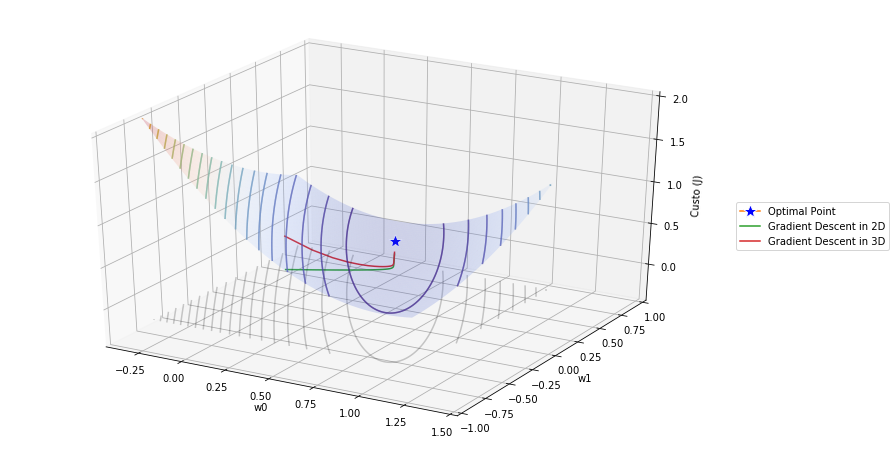

In [23]:
from mpl_toolkits.mplot3d import Axes3D
def contour_plot_3D(X_bias, y, w_history, w_opt):
    #creates the mesh for the multivariate plot
    
    size = 256
    w0 = np.linspace(-0.5,1,size)
    w1 = np.linspace(-0.5,1,size)
    J_history_2 = np.zeros((len(w0),len(w1)))
    ws1, ws2 = np.meshgrid(w0,w1)
    w_grid = np.c_[ws1.ravel(), ws2.ravel()]

    J_history_2 = compute_cost(X_bias,y,w_grid.T)
    J_history_2 = J_history_2.reshape(size,size)
    
    #creates a 3D fig istance with a proper size
    fig = plt.figure(figsize=(10,6))
    ax = fig.add_subplot(1,3,3, projection='3d')
    

    ax3d = Axes3D(fig)
    ax3d.sides_to_draw = list('r')
    ax = fig.add_axes(ax3d)

    C = plt.contour(ws1, ws2, J_history_2,20,offset=np.min(ws1), zdir='z',colors = 'k',linewidth=0.1,alpha=0.2)
    plt.clabel(C,inline=True,fontsize=10)
    ##Creates a surface for the function and the mesh points
    ax.plot_surface(ws1, ws2, J_history_2, rstride=5, cstride=5,edgecolor='none', alpha=.2, cmap=cm.coolwarm)
    #Creates a contour, one with a color map and one black so it is better to see the contour lines.
    ax.contour(ws1, ws2, J_history_2,20, color="black",alpha = 0.7, stride=30)
    ax.contour(ws1, ws2, J_history_2,20, cmap=cm.coolwarm,alpha = 0.3, stride=30)
    
    
    #Set the legend of the axes
    ax.set_xlabel('w0')
    ax.set_ylabel('w1')
    ax.set_zlabel('Custo (J)')
    
    #Create the optimal minimum (calculated analytically)
    ax.plot(w_opt[0],w_opt[1],compute_cost(X_bias,y,(w_opt[0],w_opt[1])), markerfacecolor='b', markeredgecolor='w', marker='*', markersize=15, label = 'Optimal Point');
    
    #Plot the trajectory of the gradient descent point projected in the 2D plot
    ax.plot(w_history[:,0],w_history[:,1],0,markersize=10,label="Gradient Descent in 2D")
    
    #Plot the trajectory of the gradient descent in 3D
    ax.plot(w_history[:,0],w_history[:,1],J_history,markersize=10,label="Gradient Descent in 3D")
    
    #set the axes limits
    ax.set_xlim3d(-0.4, 1.5)
    ax.set_ylim3d(-1.0, 1.0)
    ax.set_zlim3d(-0.4, 2.0)
    
    legend = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    fig.savefig('fig_3D.png', bbox_extra_artists=(legend,), bbox_inches='tight')
contour_plot_3D(X_bias, y, w_history, w_opt)

In [18]:
%ls -ls

total 804
  4 -rw-r--r-- 1 g192801 g192801   1706 Aug 15 09:27 Copying the file.ipynb
  8 -rw-r--r-- 1 g192801 g192801   7187 Aug 15 09:35 exercise_one_hot.ipynb
 88 -rw-r--r-- 1 g192801 g192801  87536 Aug 15 09:52 fig_2D.png
112 -rw-r--r-- 1 g192801 g192801 112494 Aug 15 09:52 fig_3D.png
592 -rw-r--r-- 1 g192801 g192801 604612 Aug 15 09:42 my_linear_regression.ipynb


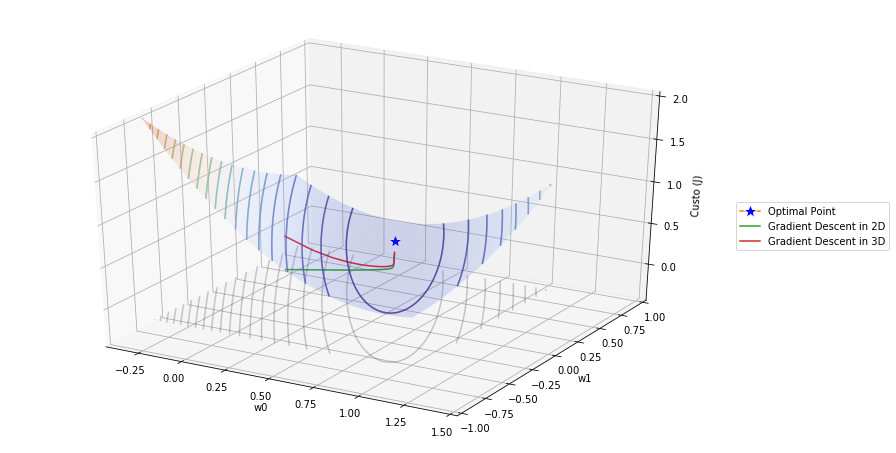

In [27]:
import IPython
img = IPython.display.Image(filename='fig_3D.png')
img

In [20]:
import pandas as pd
print("Parameters in each iteration")
data_history = pd.DataFrame(data=w_history[:,:])
data_history.columns = ['w0','w1']
data_history

Parameters in each iteration


,w0,w1
0,0.000000,0.000000
1,0.120000,0.067329
2,0.209357,0.118743
3,0.275770,0.158229
4,0.325004,0.188773
5,0.361377,0.212611
6,0.388124,0.231417
7,0.407666,0.246447
8,0.421817,0.258638
9,0.431935,0.268696
